In [7]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from game import Game
from aiplayer import AIPlayer
from randomplayer import RandomPlayer


In [8]:
# Constants
N_GAMES = 1000
STRATEGIES = [1, 2, 3, 4]  # Dumb, Weak, Strong, Godlike

# Initialize results dictionary
results = {"Dumb AI": {"Wins": 0, "Draws": 0}, "Weak AI": {"Wins": 0, "Draws": 0}, "Strong AI": {"Wins": 0, "Draws": 0},"GODLIKE AI": {"Wins": 0, "Draws": 0}}

# Simulation function
def simulate_games():
    random_player = RandomPlayer()
    for strategy in STRATEGIES:
        ai_player = AIPlayer(max_depth=strategy)
        for _ in tqdm(range(N_GAMES), desc=f"Playing games as {ai_player.name}"):
            game = Game()
            winner = game.play(ai_player, random_player, False)
            if winner == 0:
                results[ai_player.name]["Wins"] += 1
            elif winner == 10:  # A draw
                results[ai_player.name]["Draws"] += 1

# Run the simulation
simulate_games()

# Plotting the results
strategies = list(results.keys())
wins = [results[strategy]["Wins"] for strategy in strategies]
draws = [results[strategy]["Draws"] for strategy in strategies]

Playing games as GODLIKE AI: 100%|██████████| 1000/1000 [22:21:58<00:00, 80.52s/it]   


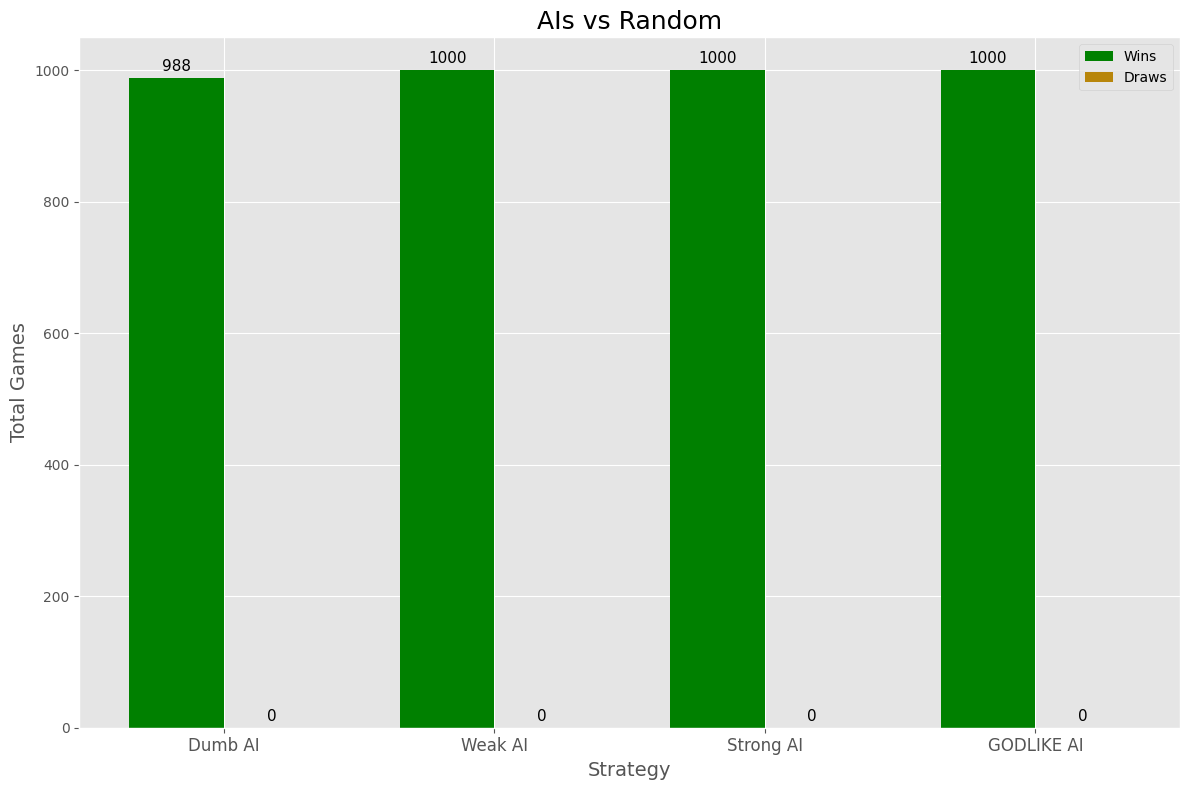

In [10]:
# Setting up the plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(strategies))

bars1 = ax.bar(index, wins, bar_width, label='Wins', color='green')
bars2 = ax.bar(index + bar_width, draws, bar_width, label='Draws', color='darkgoldenrod')

ax.set_xlabel('Strategy', fontsize=14)
ax.set_ylabel('Total Games', fontsize=14)
ax.set_title('AIs vs Random', fontsize=18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(strategies, fontsize=12)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()